In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

aas = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'H', 'I', 'G', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

def sort_dict_by_key(mydict):
    sorted_dict = {}
    for key in sorted(mydict):
           sorted_dict[key] = mydict[key]
    return sorted_dict

# Load training data
training_data = pd.read_csv("training_data.csv")
tm_helices = training_data.loc[training_data['Is Transmembrane'] == 1]
nontm_helices = training_data.loc[training_data['Is Transmembrane'] == 0]

<function matplotlib.pyplot.show(*args, **kw)>

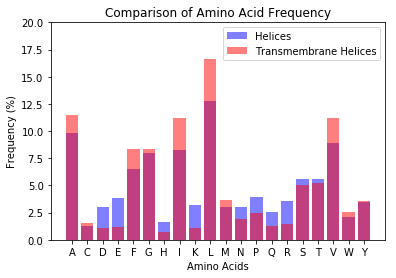

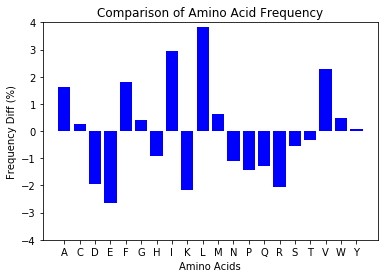

In [2]:
# Plots
tm_helix_sequences = list(tm_helices["Helix Sequence"])
tm_helix_aas = dict(collections.Counter("".join(tm_helix_sequences)))
tm_helix_aas_count = sum(tm_helix_aas.values())
for key in tm_helix_aas.keys():
    tm_helix_aas[key] = tm_helix_aas.get(key)/tm_helix_aas_count*100
tm_helix_aas = sort_dict_by_key(tm_helix_aas)


nontm_helix_sequences = list(nontm_helices["Helix Sequence"])
nontm_helix_aas = dict(collections.Counter("".join(nontm_helix_sequences)))
nontm_helix_aas_count = sum(nontm_helix_aas.values())
for key in nontm_helix_aas.keys():
    nontm_helix_aas[key] = nontm_helix_aas.get(key)/nontm_helix_aas_count*100
nontm_helix_aas = sort_dict_by_key(nontm_helix_aas)
    
f1 = plt.figure()
plt.bar(range(len(nontm_helix_aas)), list(nontm_helix_aas.values()), align='center', color='blue', alpha=0.5)
plt.bar(range(len(tm_helix_aas)), list(tm_helix_aas.values()), align='center', color='red', alpha=0.5)
plt.xticks(range(len(tm_helix_aas)), list(tm_helix_aas.keys()))
plt.title("Comparison of Amino Acid Frequency")
plt.legend(["Helices", "Transmembrane Helices"])
plt.xlabel("Amino Acids")
plt.ylabel("Frequency (%)")
plt.ylim([0,20])
plt.show 

diff_dict = {}
for key in tm_helix_aas:
    diff_dict[key] = tm_helix_aas[key]-nontm_helix_aas[key]
    
f2 = plt.figure()
plt.bar(range(len(nontm_helix_aas)), list(diff_dict.values()), align='center', color='blue')
plt.xticks(range(len(tm_helix_aas)), list(tm_helix_aas.keys()))
plt.title("Comparison of Amino Acid Frequency")
plt.xlabel("Amino Acids")
plt.ylabel("Frequency Diff (%)")
plt.ylim([-4,4])
plt.show 

In [3]:
# Create Features

def count_aas(helix):
    counts = []
    for aa in aas:
        counts.append(helix.count(aa))
    return counts

def create_aa_frequency_features(df):
    X = []
    Y = list(df["Is Transmembrane"])
    helices = list(df["Helix Sequence"])
    for helix in helices:
        X.append(count_aas(helix))  
    
    return X, Y
        
X, y = create_aa_frequency_features(training_data)

import pickle

with open('simple_aa_frequency_features.pkl', 'wb') as f:
    pickle.dump(np.array(X), f)

with open('simple_aa_frequency_labels.pkl', 'wb') as f:
    pickle.dump(np.array(y), f)